In [3]:
import pandas as pd

In [2]:
df = pd.read_csv("runs/run_20240724_122418_content_prompt/prompt_0/evaluation_results.csv")

In [3]:
df.head()

,pid,question,answer,model_response,extracted_number,is_correct,duration,token_usage
0,3,△ABC的两内角平分线OB、OC相交于点O，若∠A＝110°，则∠BOC＝（）,145°,The problem asks us to find the measure of ang...,145.0,1.0,5.497047,888.0
1,5,Find $m\angle H$,97,"The image shows a pentagon, which is a polygon...",97.0,1.0,3.237454,559.0
2,9,如图是一株美丽的勾股树，其中所有四边形都是正方形，所有的三角形都是直角三角形，若正方形A、B...,8,"The image shows a ""Pythagorean tree,"" where al...",8.0,1.0,3.045672,611.0
3,17,如图，在Rt△ABC中，∠ACB＝90°，D是AB的中点，AB＝10，则CD的长为（）,5,The problem asks us to find the length of CD i...,5.0,1.0,2.235531,477.0
4,28,"$\overline{AB}$ is a diameter, $AC=8$ inches, ...",8.5,Here's how to solve the problem:\n\n1. **Recog...,8.5,1.0,3.132079,575.0


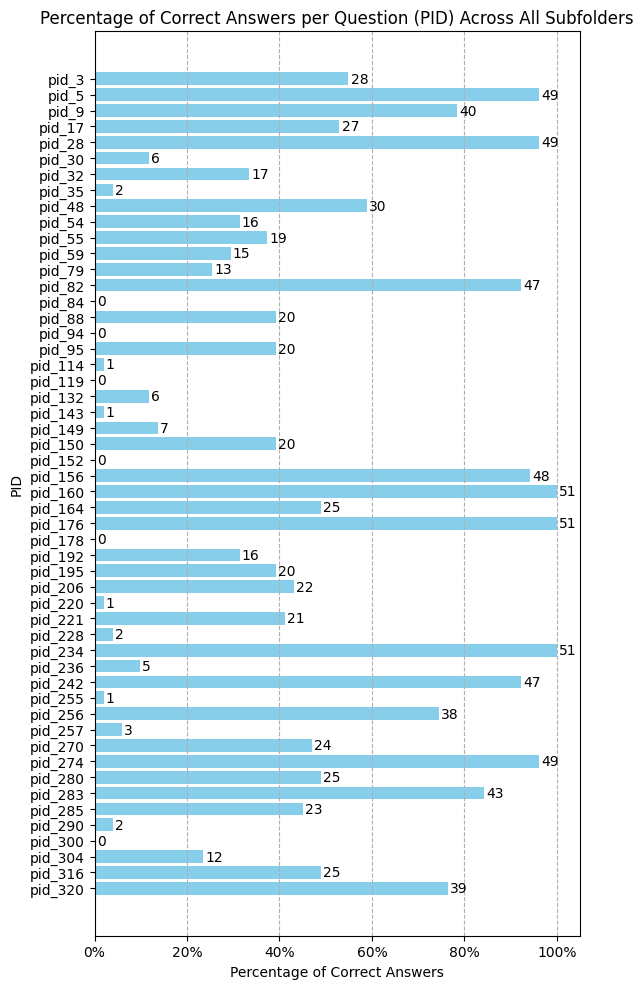

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def count_correct_answers(folder_path):
    correct_counts = {}
    total_counts = {}

    for i in range(51):
        subfolder = os.path.join(folder_path, f'prompt_{i}')
        file_path = os.path.join(subfolder, 'evaluation_results.csv')
        
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            for pid in df['pid']:
                if pid in total_counts:
                    total_counts[pid] += 1
                else:
                    total_counts[pid] = 1
                
                if pid in correct_counts and df.loc[df['pid'] == pid, 'is_correct'].iloc[0] == 1:
                    correct_counts[pid] += 1
                elif df.loc[df['pid'] == pid, 'is_correct'].iloc[0] == 1:
                    correct_counts[pid] = 1

    return correct_counts, total_counts

def percentage_formatter(x, _):
    return f'{int(x)}%'

def plot_correct_answers(correct_counts, total_counts):
    all_pids = sorted(total_counts.keys())
    sorted_counts = [correct_counts.get(pid, 0) for pid in all_pids]
    sorted_totals = [total_counts[pid] for pid in all_pids]
    sorted_percentages = [(correct_counts.get(pid, 0) / total_counts[pid]) * 100 for pid in all_pids]
    sorted_pids = [f'pid_{pid}' for pid in all_pids]

    plt.figure(figsize=(6, 10))
    bars = plt.barh(sorted_pids, sorted_percentages, color='skyblue')
    plt.xlabel('Percentage of Correct Answers')
    plt.ylabel('PID')
    plt.title('Percentage of Correct Answers per Question (PID) Across All Subfolders')
    plt.gca().invert_yaxis()  # Invert the y-axis to have ascending order
    plt.grid(axis='x', linestyle='--')

    # Annotate bars with absolute numbers
    for bar, count in zip(bars, sorted_counts):
        plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{count}', va='center')

    # Set the x-axis formatter to display percentages
    plt.gca().xaxis.set_major_formatter(FuncFormatter(percentage_formatter))

    plt.tight_layout()
    plt.show()

# Example usage:
folder_path = 'runs/run_20240724_122418_content_prompt'
correct_counts, total_counts = count_correct_answers(folder_path)
plot_correct_answers(correct_counts, total_counts)

In [1]:
import os
import pandas as pd

def find_correct_answers(folder_path, pid):
    correct_folders = []

    for i in range(51):
        subfolder = os.path.join(folder_path, f'prompt_{i}')
        file_path = os.path.join(subfolder, 'evaluation_results.csv')
        
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            # Filter the dataframe for the given pid and where is_correct is 1
            correct_answers = df[(df['pid'] == pid) & (df['is_correct'] == 1)]
            if not correct_answers.empty:
                correct_folders.append(subfolder)
    
    return correct_folders

# Example usage:
folder_path = 'runs/run_20240724_122418_content_prompt'
pid = 32  # Replace with the desired pid
correct_folders = find_correct_answers(folder_path, pid)

print(f"The question with pid {pid} was answered correctly in the following folders:")
for folder in correct_folders:
    print(folder)


The question with pid 32 was answered correctly in the following folders:
runs/run_20240724_122418_content_prompt/prompt_4
runs/run_20240724_122418_content_prompt/prompt_7
runs/run_20240724_122418_content_prompt/prompt_11
runs/run_20240724_122418_content_prompt/prompt_12
runs/run_20240724_122418_content_prompt/prompt_13
runs/run_20240724_122418_content_prompt/prompt_15
runs/run_20240724_122418_content_prompt/prompt_16
runs/run_20240724_122418_content_prompt/prompt_18
runs/run_20240724_122418_content_prompt/prompt_19
runs/run_20240724_122418_content_prompt/prompt_20
runs/run_20240724_122418_content_prompt/prompt_30
runs/run_20240724_122418_content_prompt/prompt_31
runs/run_20240724_122418_content_prompt/prompt_34
runs/run_20240724_122418_content_prompt/prompt_44
runs/run_20240724_122418_content_prompt/prompt_45
runs/run_20240724_122418_content_prompt/prompt_46
runs/run_20240724_122418_content_prompt/prompt_48
